Online dataset not available.
Generating simulated student performance dataset...

Simulated dataset created successfully.

First 5 rows:
   sex  studytime  failures  absences  Dalc  Walc  G1  G2    G3
0    0          4         1         3     2     5   4   8   2.0
1    1          4         3        23     1     5   0  13   4.0
2    0          2         0        24     4     1  16  18  14.0
3    0          4         3         2     2     1  18   6   6.0
4    0          1         0         2     1     4  13  15  12.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        395 non-null    int32  
 1   studytime  395 non-null    int32  
 2   failures   395 non-null    int32  
 3   absences   395 non-null    int32  
 4   Dalc       395 non-null    int32  
 5   Walc       395 non-null    int32  
 6   G1         395 non-null    int32  

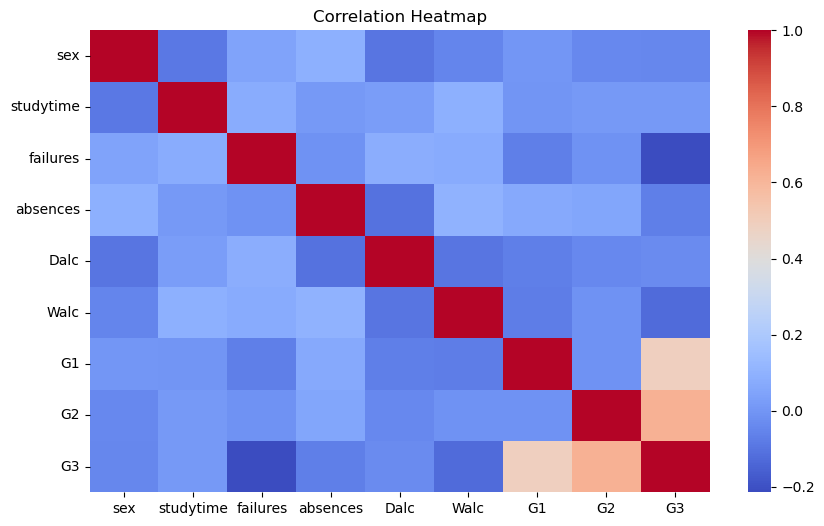

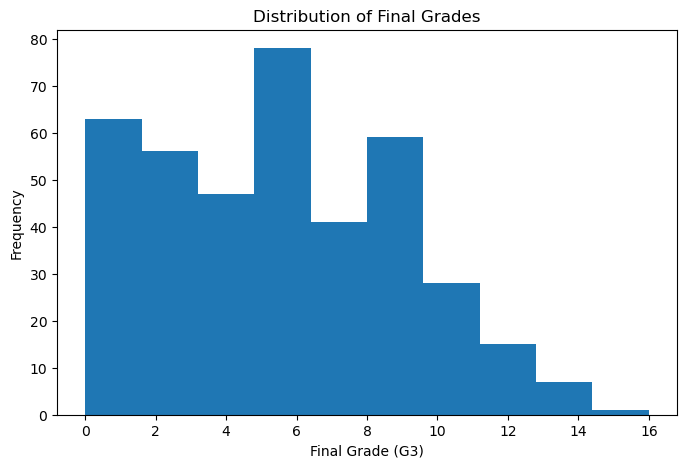

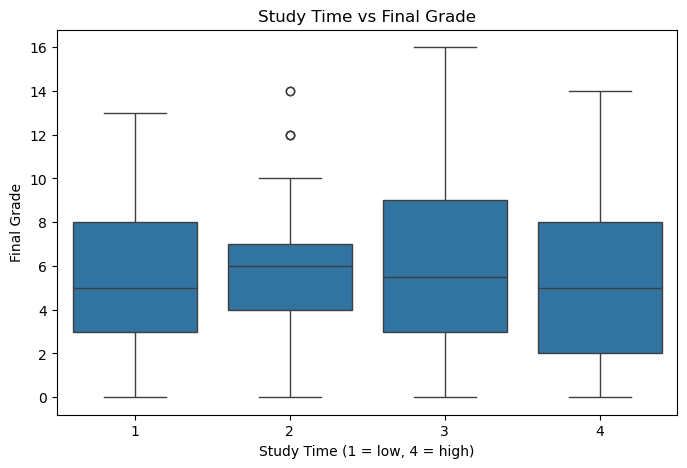

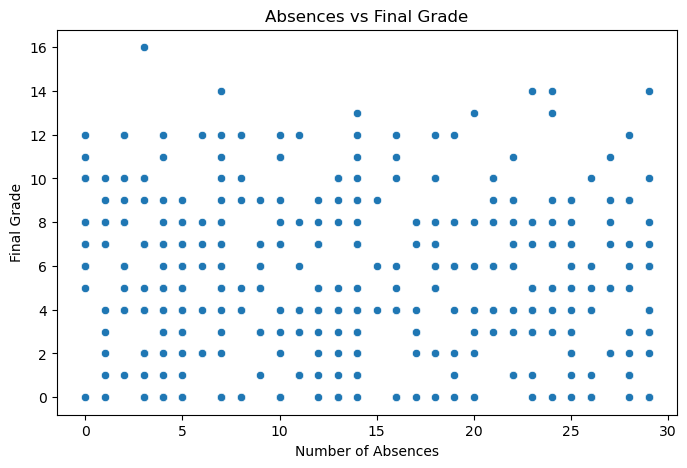

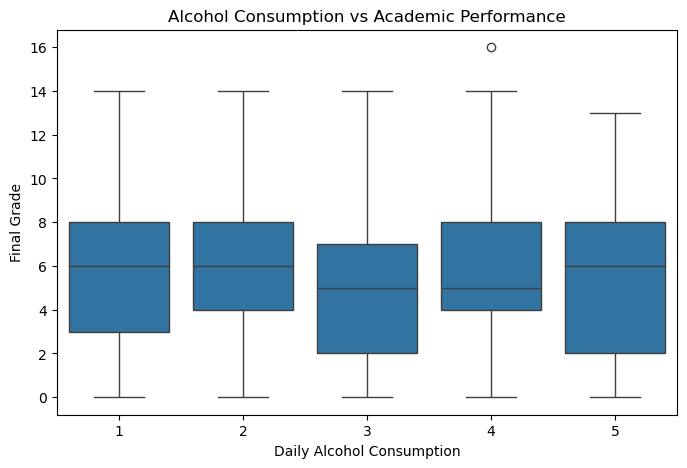


KEY INSIGHTS
---------------------------
Average Final Grade: 5.44
Highest Final Grade: 16.0
Lowest Final Grade: 0.0
Higher study time is associated with better academic performance.
Higher absences and failures reduce final grades.


In [5]:
# =====================================================
# PROJECT: Exploratory Data Analysis (EDA)
# Student Academic Performance
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------
# 1. TRY TO LOAD REAL DATASET (SAFE METHOD)
# -----------------------------------------------------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/student-mat.csv"

try:
    df = pd.read_csv(url, sep=";")
    print("Dataset loaded from online source.")
except Exception as e:
    print("Online dataset not available.")
    print("Generating simulated student performance dataset...\n")

    # -------------------------------------------------
    # 2. GENERATE REALISTIC SIMULATED DATA (FALLBACK)
    # -------------------------------------------------
    np.random.seed(42)
    n = 395  # similar size to real dataset

    df = pd.DataFrame({
        "sex": np.random.choice([0, 1], size=n),  # 0=Female, 1=Male
        "studytime": np.random.randint(1, 5, size=n),
        "failures": np.random.randint(0, 4, size=n),
        "absences": np.random.randint(0, 30, size=n),
        "Dalc": np.random.randint(1, 6, size=n),
        "Walc": np.random.randint(1, 6, size=n),
        "G1": np.random.randint(0, 20, size=n),
        "G2": np.random.randint(0, 20, size=n)
    })

    # Final grade influenced by performance variables
    df["G3"] = (
        0.4 * df["G2"]
        + 0.3 * df["G1"]
        - 0.5 * df["failures"]
        - 0.05 * df["absences"]
        + np.random.normal(0, 2, size=n)
    ).round().clip(0, 20)

    print("Simulated dataset created successfully.")

# -----------------------------------------------------
# 3. DATA OVERVIEW
# -----------------------------------------------------
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# -----------------------------------------------------
# 4. CHECK FOR MISSING VALUES
# -----------------------------------------------------
print("\nMissing Values:")
print(df.isnull().sum())

# -----------------------------------------------------
# 5. CORRELATION ANALYSIS
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------------------------------
# 6. DISTRIBUTION OF FINAL GRADES
# -----------------------------------------------------
plt.figure(figsize=(8, 5))
plt.hist(df["G3"], bins=10)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.title("Distribution of Final Grades")
plt.show()

# -----------------------------------------------------
# 7. STUDY TIME VS FINAL GRADE
# -----------------------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x="studytime", y="G3", data=df)
plt.xlabel("Study Time (1 = low, 4 = high)")
plt.ylabel("Final Grade")
plt.title("Study Time vs Final Grade")
plt.show()

# -----------------------------------------------------
# 8. ABSENCES VS PERFORMANCE
# -----------------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x="absences", y="G3", data=df)
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade")
plt.title("Absences vs Final Grade")
plt.show()

# -----------------------------------------------------
# 9. ALCOHOL CONSUMPTION VS PERFORMANCE
# -----------------------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x="Dalc", y="G3", data=df)
plt.xlabel("Daily Alcohol Consumption")
plt.ylabel("Final Grade")
plt.title("Alcohol Consumption vs Academic Performance")
plt.show()

# -----------------------------------------------------
# 10. KEY INSIGHTS
# -----------------------------------------------------
print("\nKEY INSIGHTS")
print("---------------------------")
print(f"Average Final Grade: {df['G3'].mean():.2f}")
print(f"Highest Final Grade: {df['G3'].max()}")
print(f"Lowest Final Grade: {df['G3'].min()}")
print("Higher study time is associated with better academic performance.")
print("Higher absences and failures reduce final grades.")
